In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy.stats import norm
from cmath import sqrt

<h1>Quadratic Equations</h1>

In [2]:
alpha_start = 1e-3
alpha_end = 1e5
N = 1000
r = (alpha_end / alpha_start) ** (1.0 / (N - 1))
alpha = np.array([alpha_start * (r ** i) for i in range(N)])

In [3]:
exact_dat = np.genfromtxt("exact.txt", delimiter=",",dtype=np.float128)
float_norm_dat = np.genfromtxt("normal_float.txt", delimiter=",",dtype=np.float128)
float_acc_dat = np.genfromtxt("accurate_float.txt", delimiter=",",dtype=np.float128)

In [4]:
exact = np.zeros((len(exact_dat),2),dtype=np.complex256)
exact[:,0] = exact_dat[:,0] + 1j*exact_dat[:,1]
exact[:,1] = exact_dat[:,2] + 1j*exact_dat[:,3]

float_norm = np.zeros((len(float_norm_dat),2),dtype=np.complex256)
float_norm[:,0] = float_norm_dat[:,0] + 1j*float_norm_dat[:,1]
float_norm[:,1] = float_norm_dat[:,2] + 1j*float_norm_dat[:,3]

float_acc = np.zeros((len(float_acc_dat),2),dtype=np.complex256)
float_acc[:,0] = float_acc_dat[:,0] + 1j*float_acc_dat[:,1]
float_acc[:,1] = float_acc_dat[:,2] + 1j*float_acc_dat[:,3]

In [5]:
exact[-2]

array([-5.09305391e-06+0.j, -1.96345968e+05+0.j], dtype=complex256)

In [6]:
float_norm[-2]

array([ 1.23713263e-03+0.j, -1.96345970e+05+0.j], dtype=complex256)

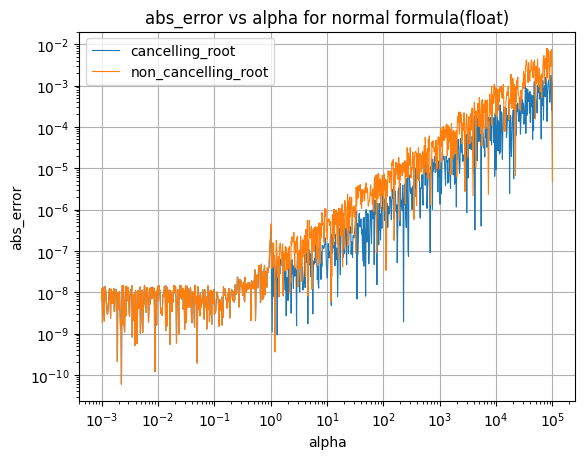

In [7]:
plt.loglog(alpha,np.abs(float_norm-exact),linewidth=0.8)
plt.legend(['cancelling_root', 'non_cancelling_root'])
plt.grid(which='major')
plt.xlabel('alpha')
plt.ylabel('abs_error')
plt.title('abs_error vs alpha for normal formula(float)')
plt.show()

In [8]:
test_alpha_double = np.float64(1000.98406189634)
test_alpha_float = np.float32(1000.98406189634)
print(test_alpha_double)
print(test_alpha_float)

1000.98406189634
1000.9841


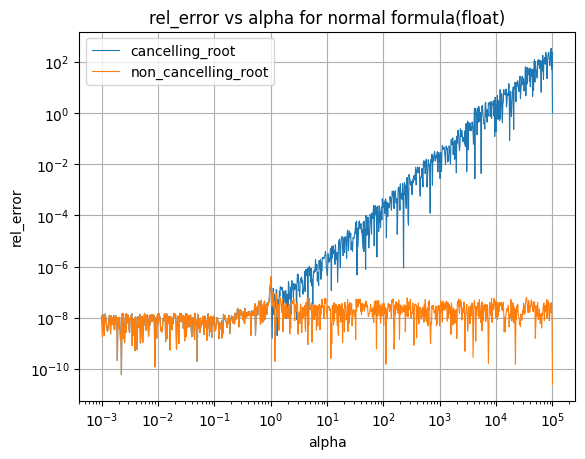

In [9]:
plt.loglog(alpha,np.abs((float_norm-exact)/exact),linewidth=0.8)
plt.legend(['cancelling_root', 'non_cancelling_root'])
plt.grid(which='major')
plt.xlabel('alpha')
plt.ylabel('rel_error')
plt.title('rel_error vs alpha for normal formula(float)')
plt.show()

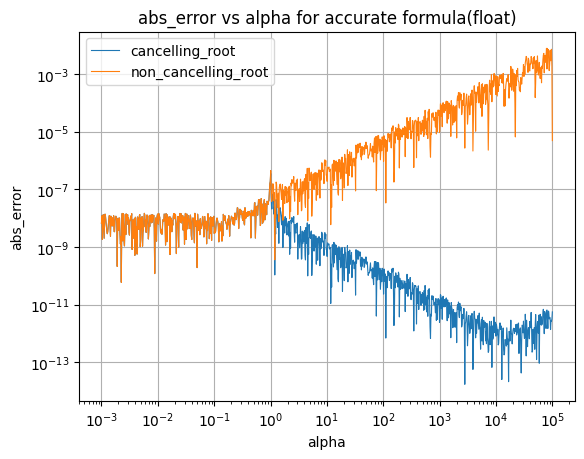

In [10]:
plt.loglog(alpha,np.abs(float_acc-exact),linewidth=0.8)
plt.legend(['cancelling_root', 'non_cancelling_root'])
plt.grid(which='major')
plt.xlabel('alpha')
plt.ylabel('abs_error')
plt.title('abs_error vs alpha for accurate formula(float)')
plt.show()

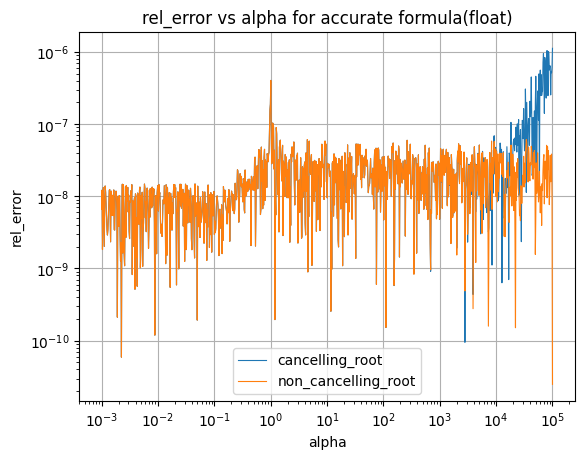

In [11]:
plt.loglog(alpha,np.abs((float_acc-exact)/exact),linewidth=0.8)
plt.legend(['cancelling_root', 'non_cancelling_root'])
plt.grid(which='major')
plt.xlabel('alpha')
plt.ylabel('rel_error')
plt.title('rel_error vs alpha for accurate formula(float)')
plt.show()

<h1>Clenshaw Algorithm</h1>

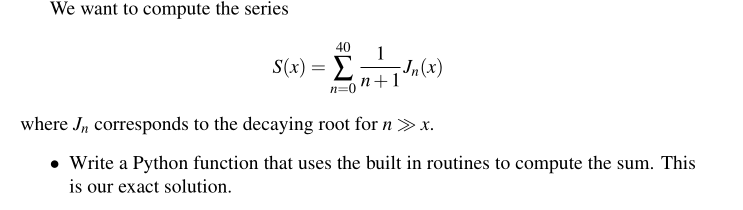

In [12]:
def exact_sum(n, x):
    return np.sum([(1/(i+1))*jv(i,x) for i in range(0,n+1)],dtype=np.float128)

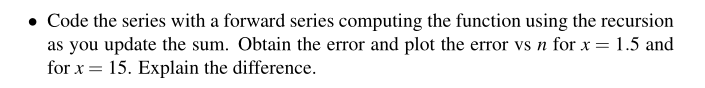

In [13]:
def for_sum(n,x):
    j_for = np.zeros(n+1,dtype=np.float128)
    j_for[0],j_for[1] = jv(0,x), jv(1,x)
    for i in range(2,n+1):
        j_for[i] = (2*(i-1)/x)*j_for[i-1] - j_for[i-2]
    return np.sum([(1/(i+1))*j_for[i] for i in range(0,n+1)])

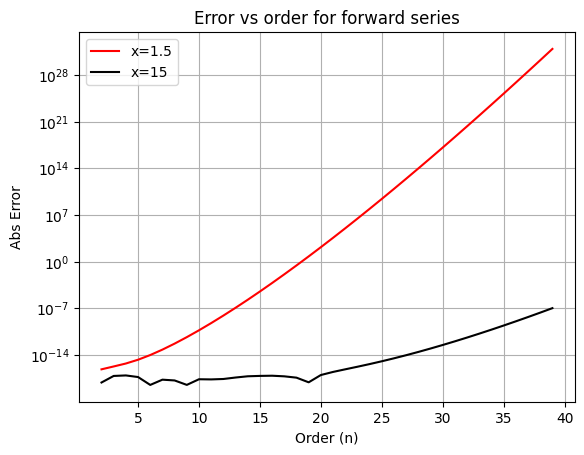

In [14]:
N_min, N_max = 2,40
err_for_1_5_for = np.abs([for_sum(i,1.5)-exact_sum(i,1.5) for i in range(N_min,N_max)])
err_for_15_for = np.abs([for_sum(i,15)-exact_sum(i,15) for i in range(N_min,N_max)])

plt.semilogy(range(N_min,N_max), err_for_1_5_for, label='x=1.5',c='red')
plt.semilogy(range(N_min,N_max), err_for_15_for, label='x=15',c='black')
plt.grid(which='both')
plt.legend()
plt.xlabel('Order (n)')
plt.ylabel('Abs Error')
plt.title('Error vs order for forward series')
plt.show()

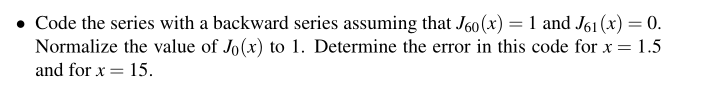

In [15]:
def back_sum(n,x):
    j_back =np.zeros(62, dtype=np.float128)
    j_back[60] = 1
    for i in range(59,-1,-1):
        j_back[i] = (2*(i+1)/x)*j_back[i+1] - j_back[i+2]
    A = j_back[0] + 2*np.sum([j_back[2*i] for i in range(1,31)])
    j_back = j_back/A
    return np.sum([(1/(i+1))*j_back[i] for i in range(0,n+1)])
    return j_back

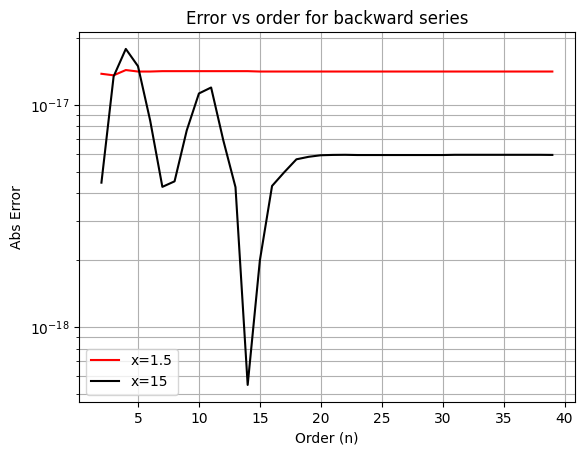

In [16]:
N_min, N_max = 2,40
err_for_1_5_back = np.abs([back_sum(i,1.5)-exact_sum(i,1.5) for i in range(N_min,N_max)])
err_for_15_back = np.abs([back_sum(i,15)-exact_sum(i,15) for i in range(N_min,N_max)])

plt.semilogy(range(N_min,N_max), err_for_1_5_back, label='x=1.5',c='red')
plt.semilogy(range(N_min,N_max), err_for_15_back, label='x=15',c='black')
plt.grid(which='both')
plt.legend()
plt.xlabel('Order (n)')
plt.ylabel('Abs Error')
plt.title('Error vs order for backward series')
plt.show()

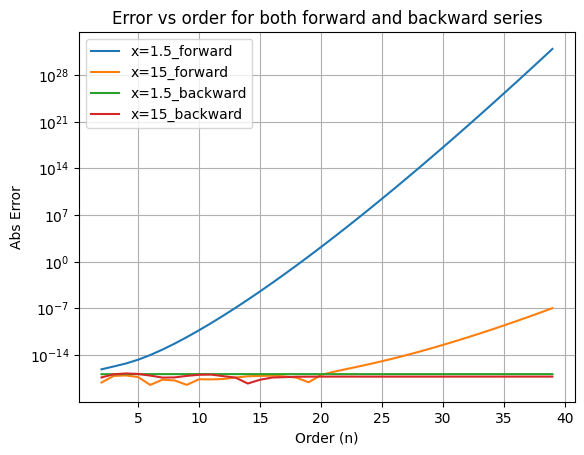

In [17]:
plt.semilogy(range(N_min,N_max), err_for_1_5_for, label='x=1.5_forward')
plt.semilogy(range(N_min,N_max), err_for_15_for, label='x=15_forward')
plt.semilogy(range(N_min,N_max), err_for_1_5_back, label='x=1.5_backward')
plt.semilogy(range(N_min,N_max), err_for_15_back, label='x=15_backward')
plt.grid(which='both')
plt.legend()
plt.xlabel('Order (n)')
plt.ylabel('Abs Error')
plt.title('Error vs order for both forward and backward series')
plt.show()

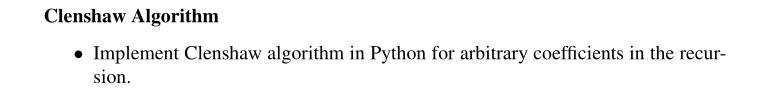

In [18]:
def clenshaw(c,f0,f1,a,b,x):
    """
    c : [c_k] coefficients in the sum
    f0, f1 : F(n=0,x), F(n=1,x)
    a, b : alpha(n,x), beta(n,x)
    NOTE : f0,f1,a,b are functions
    """
    N = len(c) - 1
    y = np.zeros(N+3)
    for k in range(N,0,-1):
        y[k] = a(k,x)*y[k+1] + b(k+1,x)*y[k+2] + c[k]
    return b(1,x)*f0(x)*y[2] + f1(x)*y[1] + f0(x)*c[0]

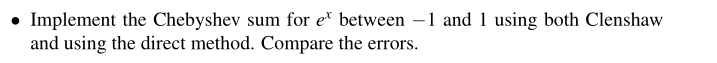

In [19]:
f = lambda x : np.exp(x)

In [20]:
# getting the chebyshev coefficientt

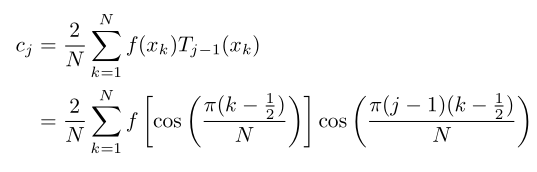

In [21]:
N = 40 # Some large number

c = np.zeros(N+1) # pass only from 1 index onto clenshaw
for i in range(1,N+1):
    c[i] = (2/N)*np.sum([f(np.cos(np.pi*(k-0.5)/N))*np.cos(np.pi*(i-1)*(k-0.5)/N)
                         for k in range(1,N+1)])

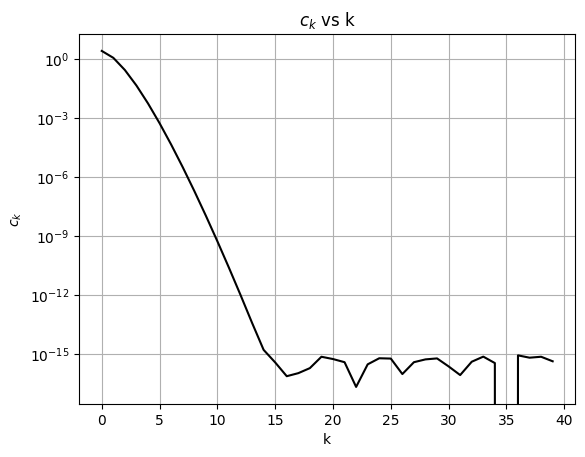

In [22]:
plt.semilogy(abs(c[1:]),c='black')
plt.xlabel('k')
plt.ylabel('$c_k$')
plt.title('$c_k$ vs k')
plt.grid()
plt.show()

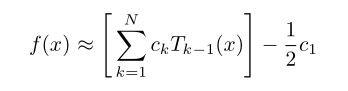

In [23]:
# using clenshaw

T0 = lambda x : 1
T1 = lambda x : x
a = lambda n, x : 2*x
b = lambda n, x : -1

m = 20

xx = np.linspace(-1,1,1000)
yy_cheb_clen = np.array([clenshaw(c[1:m+1],T0,T1,a,b,x) - c[1]/2 for x in xx])

x = np.array([np.cos(np.pi*(i-0.5)/N)for i in range(N+1)])
y = f(x)

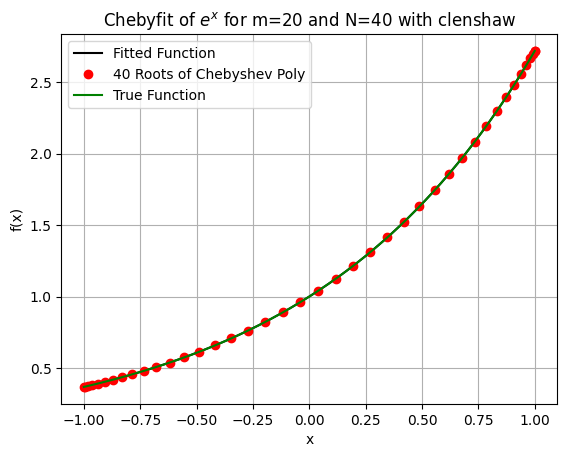

In [24]:
plt.plot(xx,yy_cheb_clen,'black',x,y,'ro',xx,f(xx),'green')
plt.legend(['Fitted Function',f'{N} Roots of Chebyshev Poly','True Function'])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Chebyfit of $e^x$ for m={m} and N={N} with clenshaw')
plt.show()

In [25]:
# using direct method

def cheby_direct(x,c):
    N = len(c)
    T = [1,x]
    tot = c[0] + c[1]*x
    for i in range(2,N):
        t = 2*x*T[-1] - T[-2]
        T.append(t)
        tot += c[i]*t
    tot = tot - c[0]/2
    return tot

In [26]:
yy_cheb_direct = np.array([cheby_direct(x,c[1:m+1]) for x in xx])

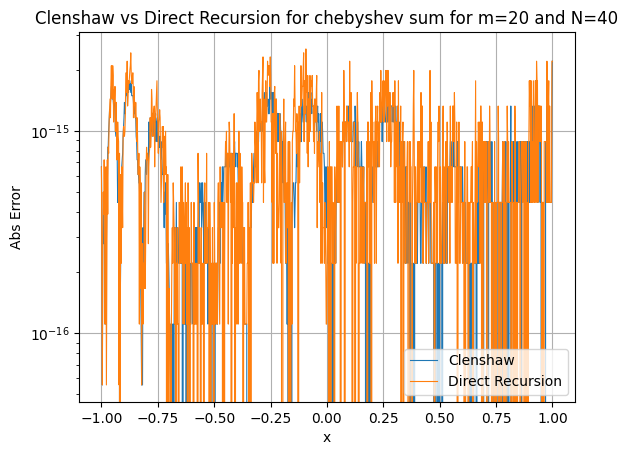

In [27]:
# Error Comparison

yy_true = f(xx)
err_cheb_clen = np.abs(yy_cheb_clen - yy_true)
err_cheb_direct = np.abs(yy_cheb_direct - yy_true)

plt.semilogy(xx,err_cheb_clen,label='Clenshaw',linewidth=0.8)
plt.semilogy(xx,err_cheb_direct,label='Direct Recursion',linewidth=0.8)
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('Abs Error')
plt.title(f'Clenshaw vs Direct Recursion for chebyshev sum for m={m} and N={N}')
plt.show()

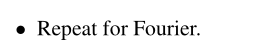

In [28]:
# fourier coefficients
a0 = np.float32(np.sinh(1))
def a_n(n):
    num = (np.exp(2) + 1) * np.pi * n * np.sin(np.pi * n) + (np.exp(2) - 1) * np.cos(np.pi * n)
    den = np.exp(1) * np.pi**2 * n**2 + np.exp(1)
    return num / den
def b_n(n):
    num = (np.exp(2) + 1) * np.sin(np.pi * n) + (1 - np.exp(2)) * np.pi * n * np.cos(np.pi * n)
    den = np.exp(1) * np.pi**2 * n**2 + np.exp(1)
    return num / den
a = np.array([0] + [a_n(n) for n in range(1,N+1)],dtype=np.float32)
b = np.array([0] + [b_n(n) for n in range(1,N+1)],dtype=np.float32)

In [29]:
# direct 
def fourier_direct(x,a0,a,b,m):
    # constant part
    tot = a0 + np.sum([a[i]*np.float32(np.cos(i*np.pi*x)) + b[i]*np.float32(np.sin(i*np.pi*x)) for i in range(1,m+1)])
    return tot

In [30]:
# clenshaw
alp = lambda n, x : 2*np.cos(np.pi*x)
beta = lambda n, x : -1

def fourier_clenshaw(x,a0,a,b,m):
    tot = a0
    # cosine part
    F0 = lambda x : np.cos(np.pi*x)
    F1 = lambda x : np.cos(2*np.pi*x)
    tot += clenshaw(a[1:m+1],F0,F1,alp,beta,x)
    # sine part
    F0 = lambda x : np.sin(np.pi*x)
    F1 = lambda x : np.sin(2*np.pi*x)
    tot += clenshaw(b[1:m+1],F0,F1,alp,beta,x)
    return tot

In [31]:
yy_four_clen = np.array([fourier_clenshaw(x,a0,a,b,m) for x in xx])
yy_four_direct = np.array([fourier_direct(x,a0,a,b,m) for x in xx])

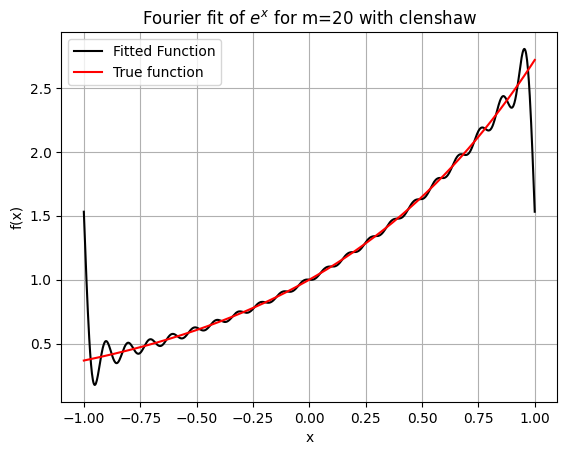

In [32]:
plt.plot(xx,yy_four_clen,'black',xx,f(xx),'red')
plt.legend(['Fitted Function','True function'])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Fourier fit of $e^x$ for m={m} with clenshaw')
plt.show()

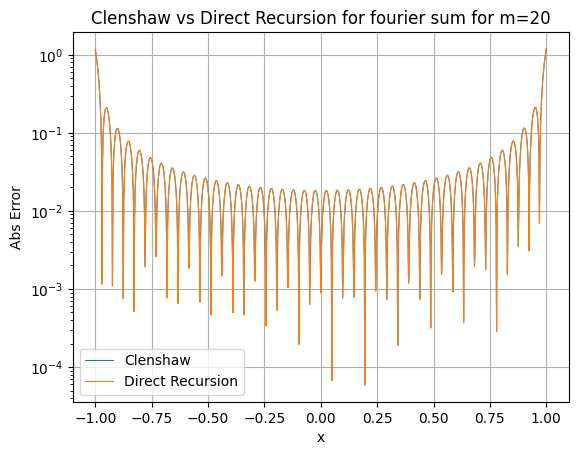

In [33]:
err_four_clen = np.abs(yy_four_clen - yy_true)
err_four_direct = np.abs(yy_four_direct - yy_true)

plt.semilogy(xx,err_four_clen,label='Clenshaw',linewidth=0.8)
plt.semilogy(xx,err_four_direct,label='Direct Recursion',linewidth=0.8)
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('Abs Error')
plt.title(f'Clenshaw vs Direct Recursion for fourier sum for m={m}')
plt.show()